<a href="https://colab.research.google.com/github/sherry-tang-97/house_price_prediction/blob/main/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
%cd drive/MyDrive/house_data/
import numpy as np
import seaborn as sns

Mounted at /content/drive
/content/drive/MyDrive/house_data


# **Read data**

In [ ]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
all=pd.concat([train, test], axis=0)

# **Impute missing values**
### Pool Variables

In [ ]:
all.PoolQC=all.PoolQC.fillna(value='None')
levs=all.PoolQC.unique().tolist()
all.PoolQC=all.PoolQC.replace(levs, value=[0,5,2,4])
all.loc[all["Id"] == 2421, "PoolQC"] = 3
all.loc[all["Id"] == 2504, "PoolQC"] = 3
all.loc[all["Id"] == 2600, "PoolQC"] = 3

### Misc variables


In [ ]:
all.MiscFeature=all.MiscFeature.fillna(value='None')
all.Alley=all.Alley.fillna(value='None')
all.Fence=all.Fence.fillna(value='None')
#all.FireplaceQu.isna().sum()
#all.Fireplaces.value_counts()
all.FireplaceQu=all.FireplaceQu.fillna(value='None')
all.LotFrontage=all.LotFrontage.fillna(value=all.LotFrontage.median())


### Garage variables


In [ ]:
garages=['Id', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
#all[all.GarageArea.isna()][garages]
#seems that id 2577 is misrecorded and it actually does not have a garage
all.loc[all["Id"] == 2577, "GarageType"] = 'None'
all.loc[all["Id"] == 2577, "GarageYrBlt"] = 'None'
all.loc[all["Id"] == 2577, "GarageFinish"] = 'None'
all.loc[all["Id"] == 2577, "GarageCars"] = 0
all.loc[all["Id"] == 2577, "GarageArea"] = 0
all.loc[all["Id"] == 2577, "GarageQual"] = 'None'
all.loc[all["Id"] == 2577, "GarageCond"] = 'None'
(all.GarageArea==0).sum()
all.loc[all["GarageArea"] == 0, "GarageType"] = 'None'
all.loc[all["GarageArea"] == 0, "GarageYrBlt"] = 'None'
all.loc[all["GarageArea"] == 0, "GarageFinish"] = 'None'
all.loc[all["GarageArea"] == 0, "GarageQual"] = 'None'
all.loc[all["GarageArea"] == 0, "GarageCond"] = 'None'
all.loc[all["Id"] == 2127, "GarageFinish"] = 'Unf'
all.loc[all["Id"] == 2127, "GarageQual"] = 'TA'
all.loc[all["Id"] == 2127, "GarageCond"] = 'TA'

### Basement variables

In [ ]:
basements=['Id', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 
           'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
all[basements].head()
a=all['BsmtFinSF1'] + all['BsmtFinSF2'] + all['BsmtUnfSF']
b=all['TotalBsmtSF']
c=all['Id']
df=pd.concat([c, a, b], axis=1)
df.columns=['Id', 'add', 'TotalBsmtSF']
df.query('add!=TotalBsmtSF')
# perfect collinearity exists, consider dropping one variable

,Id,add,TotalBsmtSF
660,2121,NaN,NaN


### Basement continue


In [ ]:
#all[all.TotalBsmtSF.isna()][basements]
#2121 does not seem to have basements
replace_with_none=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
replace_with_zero=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
all.loc[all["Id"] == 2121, replace_with_none] = 'None'
all.loc[all["Id"] == 2121, replace_with_zero] = 0
all.loc[all["TotalBsmtSF"] == 0, replace_with_none] = 'None'
all.loc[all["TotalBsmtSF"] == 0, replace_with_zero] = 0
#all[all.BsmtCond.isna()][basements]
all.loc[all.BsmtCond.isna(), "BsmtCond"] = 'TA'
all[all.Id==2186][basements]
all.loc[all.BsmtExposure.isna(), "BsmtExposure"] = 'No'
all.loc[all.BsmtQual.isna(), "BsmtQual"] = 'TA'
all[all.BsmtFinType2.isna()][basements]
all.loc[all.BsmtFinType2.isna(), "BsmtFinType2"] = 'GLQ'


### Other variables

In [ ]:
all.loc[all.MasVnrArea.isna(), "MasVnrArea"] = 0
all.loc[all.MasVnrArea==0, "MasVnrType"] = 'None'
all.loc[all.MasVnrType.isna(), "MasVnrType"] = 'BrkFace'
all.loc[all.MSZoning.isna(), "MSZoning"] = 'RL'
all.loc[all.Functional.isna(), "Functional"] = 'Typ'
all.loc[all.Utilities.isna(), "Utilities"] = 'AllPub'
all.loc[all.KitchenQual.isna(), "KitchenQual"] = 'TA'
all.loc[all.Exterior1st.isna(), "Exterior1st"] = 'VinylSd'
all.loc[all.Exterior2nd.isna(), "Exterior2nd"] = 'VinylSd'
all.loc[all.SaleType.isna(), "SaleType"] = 'WD'
all.loc[all.Electrical.isna(), "Electrical"] = 'SBrkr'


# **Preprocessing**

### Lable-encode the ordinal variables

In [ ]:
all.LotShape=all.LotShape.replace(['Reg', 'IR1', 'IR2', 'IR3'], value=[3,2,1,0])
all.LandSlope=all.LandSlope.replace(['Gtl', 'Mod', 'Sev'], value=[2,1,0])
all.ExterQual=all.ExterQual.replace(['Gd', 'TA', 'Ex', 'Fa'], value=[3,2,4,1])
all.ExterCond=all.ExterCond.replace(['TA', 'Gd', 'Fa', 'Po', 'Ex'], value=[2,3,1,0,4])

grades=['Ex','Gd','TA','Fa','Po','None']
scores=[5,4,3,2,1,0]

all.BsmtQual=all.BsmtQual.replace(grades, value=scores)
all.BsmtCond=all.BsmtCond.replace(grades, value=scores)

exps=['Gd','Av','Mn','No','None']
exps_score=[4,3,2,1,0]
all.BsmtExposure=all.BsmtExposure.replace(exps, value=exps_score)

ft=['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None']
fts=[6,5,4,3,2,1,0]
all.BsmtFinType1=all.BsmtFinType1.replace(ft, value=fts)
all.BsmtFinType2=all.BsmtFinType2.replace(ft, value=fts)

grades_wo=['Ex','Gd','TA','Fa','Po']
scores_wo=[4,3,2,1,0]
all.HeatingQC=all.HeatingQC.replace(grades_wo, value=scores_wo)
all.KitchenQual=all.KitchenQual.replace(grades_wo, value=scores_wo)

f=['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal']
fs=[7,6,5,4,3,2,1,0]
all.Functional=all.Functional.replace(f, value=fs)
all.FireplaceQu=all.FireplaceQu.replace(grades, value=scores)

gf=['Fin','RFn','Unf','None']   
gfs=[3,2,1,0] 
all.GarageFinish=all.GarageFinish.replace(gf, value=gfs)
all.GarageQual=all.GarageQual.replace(grades, value=scores)
all.GarageCond=all.GarageCond.replace(grades, value=scores)
p=['Y','P','N']
ps=[2,1,0]
all.PavedDrive=all.PavedDrive.replace(p, value=ps)
pool=['Ex','Gd','TA','Fa','None']
pools=[4,3,2,1,0]
all.PoolQC=all.PoolQC.replace(pool, value=pools)

fence=['GdPrv','MnPrv','GdWo','MnWw','None']
fences=[4,3,2,1,0]
all.Fence=all.Fence.replace(fence, value=fences)

ordinals=['LotShape', 'LandSlope', 'ExterQual','ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
'GarageQual', 'GarageCond', 'PavedDrive','PoolQC','Fence']

numerics=all.dtypes[all.dtypes!='object'].index.tolist()
numerics=[ele for ele in numerics if ele not in ordinals]
all_vs=all.dtypes.index.tolist()
cats=[ele for ele in all_vs if ele not in (ordinals+numerics)]
numerics=[ele for ele in numerics if ele not in ['Id', 'SalePrice']]
#regroup neibourhood, Exterior1st, Exterior2nd, 

### Regroup variables that contain too many levels

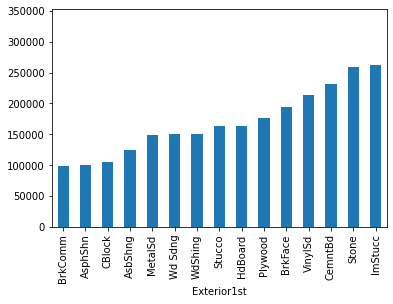

In [ ]:
pd.set_option("display.max_columns", None)
all[cats].describe()
d=all.groupby(['Neighborhood'])['SalePrice'].mean().sort_values()
d.plot(kind='bar')
low_neibs=['MeadowV', 'IDOTRR', 'BrDale']
high_neibs=['StoneBr', 'NridgHt', 'NoRidge']
all_neibs=all.Neighborhood.unique().tolist()
med_neibs=[ele for ele in all_neibs if ele not in (low_neibs+high_neibs)]


d_e1=all.groupby(['Exterior1st'])['SalePrice'].mean().sort_values()
d_e1.plot(kind='bar')

all_e1=all.Exterior1st.unique().tolist()
high_e1=['VinylSd', 'CemntBd', 'Stone', 'ImStucc']
low_e1=['BrkComm', 'AsphShn', 'CBlock']
med_e1=[ele for ele in all_e1 if ele not in (low_e1+high_e1)]

d_e2=all.groupby(['Exterior2nd'])['SalePrice'].mean().sort_values()

all_e2=all.Exterior2nd.unique().tolist()
high_e2=['CmentBd', 'ImStucc','Other' ]
low_e2=['CBlock', 'AsbShng', 'Brk Cmn']
med_e2=[ele for ele in all_e2 if ele not in (low_e2+high_e2)]

all.Neighborhood=all.Neighborhood.replace(high_neibs, 'High').replace(low_neibs, 'Low').replace(med_neibs, 'Middle')
all.Exterior1st=all.Exterior1st.replace(high_e1, 'High').replace(low_e1, 'Low').replace(med_e1, 'Middle')
all.Exterior2nd=all.Exterior2nd.replace(high_e2, 'High').replace(low_e2, 'Low').replace(med_e2, 'Middle')

In [ ]:
# make MSSubClass and month categorical instead
numerics=[ele for ele in numerics if ele not in ['MoSold','MSSubClass']]
cats=cats+['MoSold','MSSubClass']

#drop some variable
cats=[ele for ele in cats if ele not in 'GarageYrBlt']
numerics=[ele for ele in numerics if ele not in 'BsmtUnfSF']

### One-hot encode categorical variables


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(all[cats].to_numpy())
one_hots=encoder.transform(all[cats].to_numpy())
cat_names=[]
for i in range(26):
  cat_names = cat_names + [cats[i] + '_' + x for x in [str(x) for x in encoder.categories_[i].tolist()]]
df_cats=pd.DataFrame(one_hots, columns=cat_names)

# **Prepare data for training**

In [ ]:
combine=pd.concat([all[numerics].reset_index(drop=True), all[ordinals].reset_index(drop=True), df_cats], axis=1)
combine=combine.merge(all['SalePrice'].reset_index(drop=True), left_index=True, right_index=True)
test1=combine[combine.SalePrice.isna()]
train1=combine[~combine.SalePrice.isna()]
train1x=train1.loc[:, train1.columns!='SalePrice']
train1y=train1['SalePrice']
test1x=test1.loc[:, test1.columns!='SalePrice']

# **Exploratory Data Analysis**

[Text(0, 0, '100K'),
 Text(0, 0, '200K'),
 Text(0, 0, '300K'),
 Text(0, 0, '400K'),
 Text(0, 0, '500K'),
 Text(0, 0, '600K'),
 Text(0, 0, '700K')]

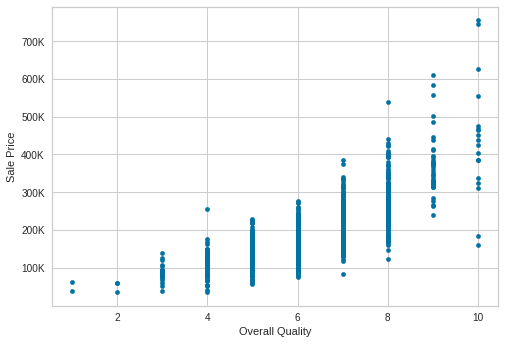

In [ ]:
fig, ax = plt.subplots()

train1.plot.scatter(x='OverallQual', y='SalePrice', ax=ax)

ax.set_xlabel('Overall Quality')
ax.set_ylabel('Sale Price')

yticks=np.arange(100000,800000,100000).tolist()
yticklabels=['100K', '200K', '300K', '400K', '500K', '600K', '700K']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

[Text(0, 0, '1K'),
 Text(0, 0, '2K'),
 Text(0, 0, '3K'),
 Text(0, 0, '4K'),
 Text(0, 0, '5K')]

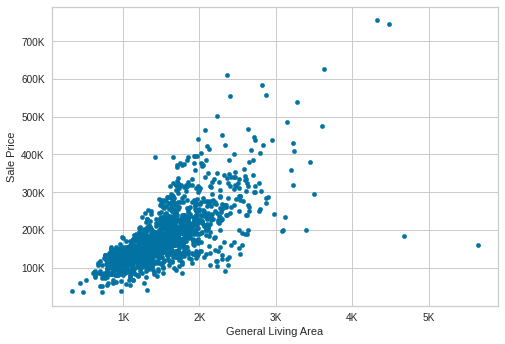

In [ ]:
fig, ax = plt.subplots()

train1.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax)

ax.set_xlabel('General Living Area')
ax.set_ylabel('Sale Price')

yticks=np.arange(100000,800000,100000).tolist()
yticklabels=['100K', '200K', '300K', '400K', '500K', '600K', '700K']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)


xticks=np.arange(1000,6000,1000).tolist()
xticklabels=['1K', '2K', '3K', '4K', '5K', '6K']
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

[Text(0, 0, '100K'),
 Text(0, 0, '200K'),
 Text(0, 0, '300K'),
 Text(0, 0, '400K'),
 Text(0, 0, '500K'),
 Text(0, 0, '600K'),
 Text(0, 0, '700K')]

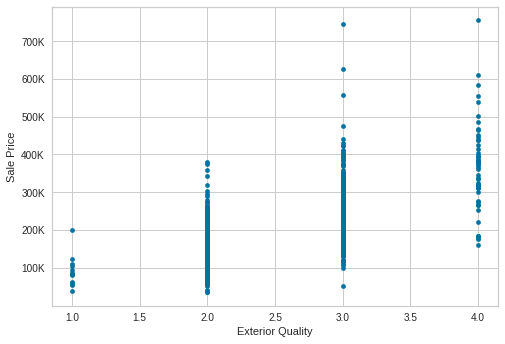

In [ ]:
fig, ax = plt.subplots()

train1.plot.scatter(x='ExterQual', y='SalePrice', ax=ax)

ax.set_xlabel('Exterior Quality')
ax.set_ylabel('Sale Price')

yticks=np.arange(100000,800000,100000).tolist()
yticklabels=['100K', '200K', '300K', '400K', '500K', '600K', '700K']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)


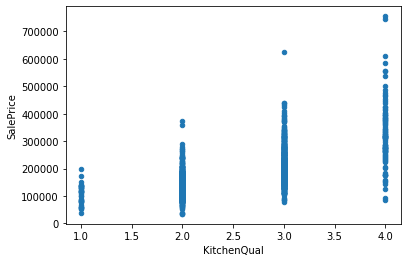

In [ ]:
train1.plot.scatter(x='KitchenQual', y='SalePrice')

[Text(0, 0, '100K'),
 Text(0, 0, '200K'),
 Text(0, 0, '300K'),
 Text(0, 0, '400K'),
 Text(0, 0, '500K'),
 Text(0, 0, '600K'),
 Text(0, 0, '700K')]

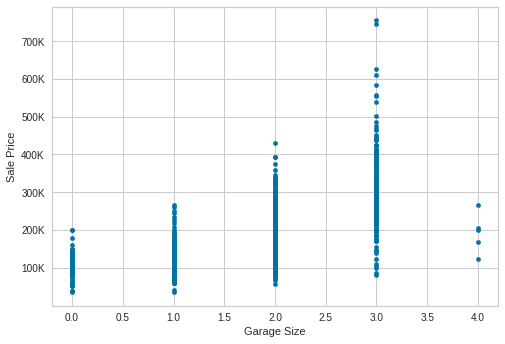

In [ ]:
fig, ax = plt.subplots()

train1.plot.scatter(x='GarageCars', y='SalePrice', ax=ax)

ax.set_xlabel('Garage Size')
ax.set_ylabel('Sale Price')

yticks=np.arange(100000,800000,100000).tolist()
yticklabels=['100K', '200K', '300K', '400K', '500K', '600K', '700K']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

# **XGBoost Model**

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, max_depth=4, eta=0.05)
model.fit(train1x, train1y)

[13:57:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.05, max_depth=4)

### Training error

In [ ]:
pred_train=model.predict(train1x)
ans=train1y.to_numpy()
data=pd.DataFrame({'ans':ans, 'pred':pred_train})

a=(np.log(data.ans)-np.log(data.pred))**2
a=a.mean()
a**0.5

0.07334949837703862

### Test error

In [ ]:
pred_xgb=model.predict(test1x)
ids=test['Id'].to_numpy()
result=pd.DataFrame({'Id':ids, 'SalePrice':pred_xgb})
result.to_csv('house.csv')

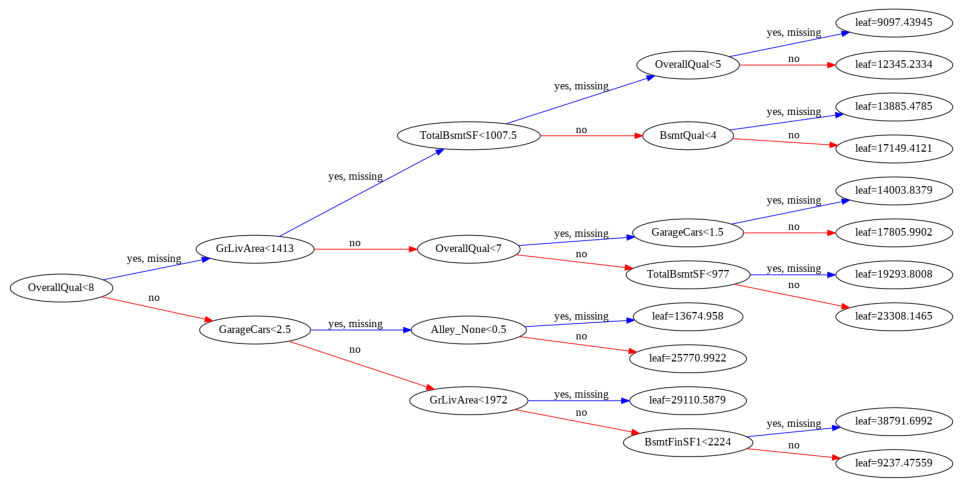

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(17, 14)) 
plot_tree(model, num_trees=0, ax=ax, rankdir='LR')
plt.show()

# **ElasticNet Model**

In [ ]:
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=2, l1_ratio=1)
enet.fit(train1x, train1y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.599e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=2, l1_ratio=1)

### Training error

In [ ]:
pred_train=enet.predict(train1x)
ans=train1y.to_numpy()
data=pd.DataFrame({'ans':ans, 'pred':pred_train})

a=(np.log(data.ans)-np.log(data.pred))**2
a=a.mean()
a**0.5

0.13711350591433616

### Test error

In [ ]:
pred=enet.predict(test1x)
ids=test['Id'].to_numpy()
result=pd.DataFrame({'Id':ids, 'SalePrice':pred})
result.to_csv('house.csv')

### Model improvement

In [ ]:
#fix skewness of response
log_train1y=np.log(train1y)
enet=ElasticNet(alpha=0.01, l1_ratio=0)
enet.fit(train1x, log_train1y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.105e+01, tolerance: 2.328e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01, l1_ratio=0)

### Training error

In [ ]:
pred_train=enet.predict(train1x)
pred_train=np.exp(pred_train)
ans=train1y.to_numpy()
data=pd.DataFrame({'ans':ans, 'pred':pred_train})

a=(np.log(data.ans)-np.log(data.pred))**2
a=a.mean()
a**0.5

0.1184827830156518

### Test error

In [ ]:
pred_enet=enet.predict(test1x)
pred_enet=np.exp(pred_enet)
ids=test['Id'].to_numpy()
result=pd.DataFrame({'Id':ids, 'SalePrice':pred_enet})
result.to_csv('house.csv')

# **Model ensemble**

In [ ]:
pred=(pred_xgb+2*pred_enet)/3
ids=test['Id'].to_numpy()
result=pd.DataFrame({'Id':ids, 'SalePrice':pred})
result.to_csv('house.csv')

# **Model Comparison**

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train1, test_size=0.2)
trainx=train.loc[:, train.columns!='SalePrice']
trainy=train['SalePrice']
testx=test.loc[:, test.columns!='SalePrice']
testy=test['SalePrice']

[13:57:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


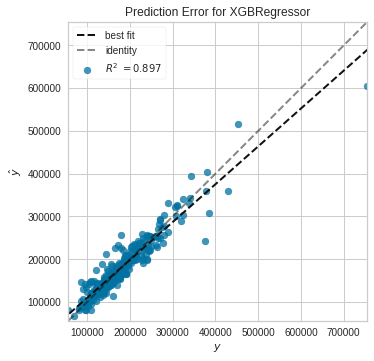

In [ ]:
#xgboost
from yellowbrick.regressor import PredictionError
model = xgb.XGBRegressor(n_estimators=100, max_depth=4, eta=0.05)
model.fit(trainx,trainy)
visualizer = PredictionError(model)
visualizer.fit(trainx, trainy)  
visualizer.score(testx, testy)  
visualizer.poof()



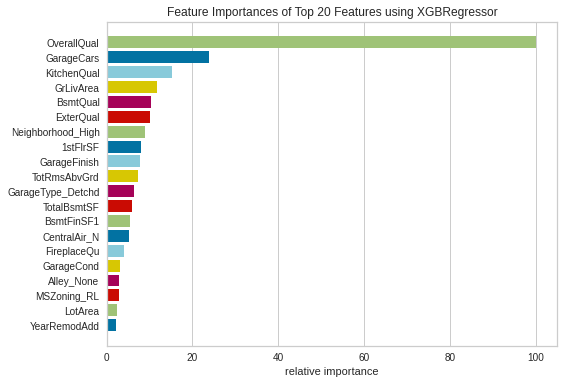

In [ ]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(model, topn=20)
viz.fit(trainx, trainy)
viz.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.445e+11, tolerance: 7.659e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


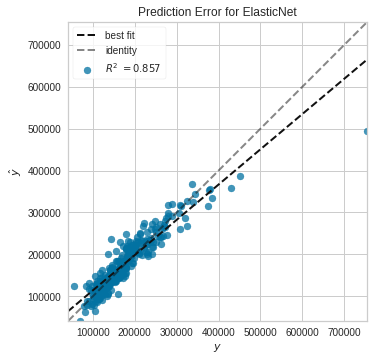

In [ ]:
enet=ElasticNet(alpha=0.05, l1_ratio=0.2)
enet.fit(trainx, trainy)
visualizer = PredictionError(enet)
visualizer.fit(trainx, trainy)  
visualizer.score(testx, testy)  
visualizer.poof()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


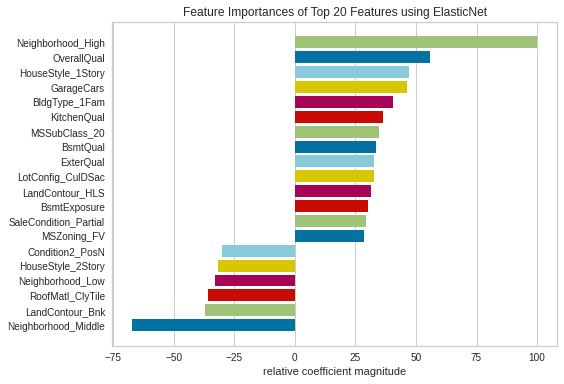

In [ ]:
viz = FeatureImportances(enet, topn=20)
viz.fit(trainx, trainy)
viz.show()